# Font recognition - improved models with PCA


## Load data and train-validation split

**Data is loaded, observed and treated**

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv('data/train_data.csv')
train_labels = pd.read_csv('data/train_labels.csv')


Labels are factorized and a full dataframe is constructed adding the encoded values as the last column

In [94]:
label_encoded, unique_labels = pd.factorize(train_labels['Font'])
labels = pd.DataFrame(label_encoded, columns=['label'])
df = pd.concat([train_data, labels], axis = 1)

**Train and validation split is conducted**

In [95]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
x_train_df, x_valid_df, y_train_df, y_valid_df = train_test_split(X, Y, test_size=0.3, random_state = 0)

**Finally, the test data is loaded as well**

In [96]:
test_data = pd.read_csv('data/test_data.csv')
x_test_df = test_data

## Normalization of data

Now df has all the needed information. It will be transformed to a np.array for easier treatment within sklearn package

In [97]:
x_train_pre_norm = np.array(x_train_df)
x_valid_pre_norm = np.array(x_valid_df)
y_train = np.array(y_train_df)
y_valid = np.array(y_valid_df)
x_test_pre_norm = np.array(x_test_df)

X_np = np.array(X)

`mean` and `std` are obtained from full dataset

In [98]:
mean = np.sum(X_np, axis = 0) / X_np.shape[0]
std = np.std(X_np, axis = 0)

Implement normalization function from Homework 9

In [99]:
def normalize(X, mean, std):
    """Normalizes a given array X by columns 
    with the mean and std"""
    X_out = np.zeros(X.shape)
    X_out = (X - mean)/std
    return X_out 

In [100]:
x_train = normalize(x_train_pre_norm, mean, std)
x_valid = normalize(x_valid_pre_norm, mean, std)
x_test = normalize(x_test_pre_norm, mean, std)

## Function to save submission csv

A function will be created that saves predictions as a csv with the correct format

In [101]:
def predictions_as_csv(y_pred, file_name):
    path = "submissions/"
    status = 0
    if len(y_pred) == 29221:
        ids = np.arange(1,len(y_pred)+1,1)
        pred_label = unique_labels[y_pred]
        data = {'ID':ids, 'Font':pred_label} 
        submission = pd.DataFrame(data)
        submission.to_csv(path + file_name + ".csv", index = False)
        status = 1
    
    return status

## PCA before applying neural network

In [102]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import hamming_loss

In [103]:
from sklearn.decomposition import PCA

pca = PCA()
x_train_pca1 = pca.fit_transform(x_train)
x_valid_pca1 = pca.transform(x_valid)
x_test_pca1 = pca.transform(x_test)

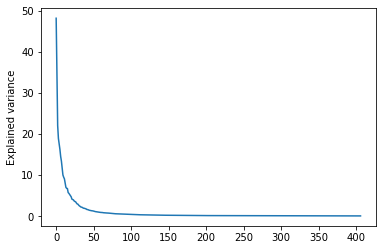

In [60]:
plt.plot(pca.explained_variance_)
plt.ylabel('Explained variance')
plt.show()


In [63]:
x_train = x_train_pca1[:,0:50]
x_valid = x_valid_pca1[:,0:50]

In [64]:
x_train.shape

(45500, 50)

## Neural network alpha = 0.5

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import hamming_loss

In [66]:
model_nNetwork = MLPClassifier(random_state=1, max_iter=300, alpha = 0.5, activation = 'logistic')
model_nNetwork.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.5, max_iter=300, random_state=1)

In [67]:
y_pred_train = model_nNetwork.predict(x_train)
error = hamming_loss(y_train, y_pred_train)
print('The training error is: ' + str(error) + '.')

The training error is: 0.42940659340659343.


In [68]:
y_pred_valid = model_nNetwork.predict(x_valid)
error = hamming_loss(y_valid, y_pred_valid)
print('The validation error is: ' + str(error) + '.')

The validation error is: 0.47035897435897434.


In [69]:
predicted_score = 1- error
predicted_score

0.5296410256410257

## Deep neural network I

In [71]:
model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.2, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(200,100,100,50) )
model_nNetwork.fit(x_train, y_train)

MLPClassifier(alpha=1.2, hidden_layer_sizes=(200, 100, 100, 50),
              learning_rate='adaptive', max_iter=1000, random_state=1)

In [72]:
y_pred_train = model_nNetwork.predict(x_train)
error = hamming_loss(y_train, y_pred_train)
print('The training error is: ' + str(error) + '.')

The training error is: 0.21413186813186813.


In [73]:
y_pred_valid = model_nNetwork.predict(x_valid)
error = hamming_loss(y_valid, y_pred_valid)
print('The validation error is: ' + str(error) + '.')

The validation error is: 0.36246153846153845.


In [74]:
predicted_score = 1- error
predicted_score

0.6375384615384616

In [70]:
0.73

0.73

## Testing if just PCA works by itself with all columns

In [63]:
x_train = x_train_pca1
x_valid = x_valid_pca1

## Deep neural network II

In [33]:
model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.2, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(200,100) )
model_nNetwork.fit(x_train, y_train)

MLPClassifier(alpha=1.2, hidden_layer_sizes=(200, 100),
              learning_rate='adaptive', max_iter=1000, random_state=1)

In [34]:
y_pred_train = model_nNetwork.predict(x_train)
error = hamming_loss(y_train, y_pred_train)
print('The training error is: ' + str(error) + '.')

The training error is: 0.11749450549450549.


In [35]:
y_pred_valid = model_nNetwork.predict(x_valid)
error = hamming_loss(y_valid, y_pred_valid)
print('The validation error is: ' + str(error) + '.')

The validation error is: 0.2721025641025641.


In [36]:
predicted_score = 1- error
predicted_score

0.7278974358974359

## Deep neural network III

In [37]:
model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.2, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(100,100) )
model_nNetwork.fit(x_train, y_train)

MLPClassifier(alpha=1.2, hidden_layer_sizes=(100, 100),
              learning_rate='adaptive', max_iter=1000, random_state=1)

In [38]:
y_pred_train = model_nNetwork.predict(x_train)
error = hamming_loss(y_train, y_pred_train)
print('The training error is: ' + str(error) + '.')

The training error is: 0.15830769230769232.


In [39]:
y_pred_valid = model_nNetwork.predict(x_valid)
error = hamming_loss(y_valid, y_pred_valid)
print('The validation error is: ' + str(error) + '.')

The validation error is: 0.2924102564102564.


In [40]:
predicted_score = 1- error
predicted_score

0.7075897435897436

## Deep neural network IV

In [41]:
model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.5, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(100,100) )
model_nNetwork.fit(x_train, y_train)

MLPClassifier(alpha=1.5, hidden_layer_sizes=(100, 100),
              learning_rate='adaptive', max_iter=1000, random_state=1)

In [42]:
y_pred_train = model_nNetwork.predict(x_train)
error = hamming_loss(y_train, y_pred_train)
print('The training error is: ' + str(error) + '.')

The training error is: 0.17672527472527472.


In [43]:
y_pred_valid = model_nNetwork.predict(x_valid)
error = hamming_loss(y_valid, y_pred_valid)
print('The validation error is: ' + str(error) + '.')

The validation error is: 0.299025641025641.


In [44]:
predicted_score = 1- error
predicted_score

0.700974358974359

## Deep neural network V

In [45]:
model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.5, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(100,100,100,100) )
model_nNetwork.fit(x_train, y_train)

MLPClassifier(alpha=1.5, hidden_layer_sizes=(100, 100, 100, 100),
              learning_rate='adaptive', max_iter=1000, random_state=1)

In [46]:
y_pred_train = model_nNetwork.predict(x_train)
error = hamming_loss(y_train, y_pred_train)
print('The training error is: ' + str(error) + '.')

The training error is: 0.1340879120879121.


In [47]:
y_pred_valid = model_nNetwork.predict(x_valid)
error = hamming_loss(y_valid, y_pred_valid)
print('The validation error is: ' + str(error) + '.')

The validation error is: 0.28615384615384615.


In [48]:
predicted_score = 1- error
predicted_score

0.7138461538461538

## Deep neural network VI

In [49]:
model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.3, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(150,50,50,50,50, 50) )
model_nNetwork.fit(x_train, y_train)

MLPClassifier(alpha=1.3, hidden_layer_sizes=(150, 50, 50, 50, 50, 50),
              learning_rate='adaptive', max_iter=1000, random_state=1)

In [50]:
y_pred_train = model_nNetwork.predict(x_train)
error = hamming_loss(y_train, y_pred_train)
print('The training error is: ' + str(error) + '.')

The training error is: 0.09059340659340659.


In [51]:
y_pred_valid = model_nNetwork.predict(x_valid)
error = hamming_loss(y_valid, y_pred_valid)
print('The validation error is: ' + str(error) + '.')

The validation error is: 0.26892307692307693.


In [52]:
predicted_score = 1- error
predicted_score

0.7310769230769231

## Deep neural network VII

In [29]:
model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.3, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(200,100,100,50) )
model_nNetwork.fit(x_train, y_train)

MLPClassifier(alpha=1.2, hidden_layer_sizes=(200, 100, 100, 50),
              learning_rate='adaptive', max_iter=1000, random_state=1)

In [30]:
y_pred_train = model_nNetwork.predict(x_train)
error = hamming_loss(y_train, y_pred_train)
print('The training error is: ' + str(error) + '.')

The training error is: 0.10287912087912088.


In [31]:
y_pred_valid = model_nNetwork.predict(x_valid)
error = hamming_loss(y_valid, y_pred_valid)
print('The validation error is: ' + str(error) + '.')

The validation error is: 0.26461538461538464.


In [32]:
predicted_score = 1- error
predicted_score

0.7353846153846153

## Loop with several PCA options

In [80]:
pca_options = [75, 100, 125,  150, 200]

In [81]:
for i in pca_options:
    print("\n==================")
    print("pca_option")
    print(i)
    x_train = x_train_pca1[:,0:i]
    x_valid = x_valid_pca1[:,0:i]
    
    model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.3, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(200,100,100,50) )
    model_nNetwork.fit(x_train, y_train)

    y_pred_train = model_nNetwork.predict(x_train)
    error = hamming_loss(y_train, y_pred_train)
    print('The training error is: ' + str(error) + '.')

    y_pred_valid = model_nNetwork.predict(x_valid)
    error = hamming_loss(y_valid, y_pred_valid)
    print('The validation error is: ' + str(error) + '.')

    predicted_score = 1- error
    predicted_score


pca_option
75
The training error is: 0.1696043956043956.
The validation error is: 0.30805128205128207.

pca_option
100
The training error is: 0.14494505494505494.
The validation error is: 0.2822051282051282.

pca_option
125
The training error is: 0.1306813186813187.
The validation error is: 0.2794358974358974.

pca_option
150
The training error is: 0.10527472527472527.
The validation error is: 0.2494871794871795.

pca_option
200
The training error is: 0.10331868131868131.
The validation error is: 0.25984615384615384.


In [82]:
pca_options = [210, 225, 250,275, 300, 350]

In [83]:
for i in pca_options:
    print("\n==================")
    print("pca_option")
    print(i)
    x_train = x_train_pca1[:,0:i]
    x_valid = x_valid_pca1[:,0:i]
    
    model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.3, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(200,100,100,50) )
    model_nNetwork.fit(x_train, y_train)

    y_pred_train = model_nNetwork.predict(x_train)
    error = hamming_loss(y_train, y_pred_train)
    print('The training error is: ' + str(error) + '.')

    y_pred_valid = model_nNetwork.predict(x_valid)
    error = hamming_loss(y_valid, y_pred_valid)
    print('The validation error is: ' + str(error) + '.')

    predicted_score = 1- error
    predicted_score


pca_option
210
The training error is: 0.09698901098901098.
The validation error is: 0.24979487179487178.

pca_option
225
The training error is: 0.09986813186813187.
The validation error is: 0.24917948717948718.

pca_option
250
The training error is: 0.09872527472527473.
The validation error is: 0.25958974358974357.

pca_option
275
The training error is: 0.0965934065934066.
The validation error is: 0.25235897435897436.

pca_option
300
The training error is: 0.09448351648351648.
The validation error is: 0.2582564102564103.

pca_option
350
The training error is: 0.09338461538461539.
The validation error is: 0.2517948717948718.


In [86]:
pca_options = [203, 207, 213,217]

In [87]:
for i in pca_options:
    print("\n==================")
    print("pca_option")
    print(i)
    x_train = x_train_pca1[:,0:i]
    x_valid = x_valid_pca1[:,0:i]
    
    model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.3, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(200,100,100,50) )
    model_nNetwork.fit(x_train, y_train)

    y_pred_train = model_nNetwork.predict(x_train)
    error = hamming_loss(y_train, y_pred_train)
    print('The training error is: ' + str(error) + '.')

    y_pred_valid = model_nNetwork.predict(x_valid)
    error = hamming_loss(y_valid, y_pred_valid)
    print('The validation error is: ' + str(error) + '.')

    predicted_score = 1- error
    predicted_score


pca_option
203
The training error is: 0.09991208791208792.
The validation error is: 0.24866666666666667.

pca_option
207
The training error is: 0.11312087912087912.
The validation error is: 0.26897435897435895.

pca_option
213
The training error is: 0.10164835164835165.
The validation error is: 0.25451282051282054.

pca_option
217
The training error is: 0.10292307692307692.
The validation error is: 0.258974358974359.


## Choosing the best one

In [107]:
x_train = x_train_pca1[:,0:203]
x_valid = x_valid_pca1[:,0:203]
x_test = x_test_pca1[:,0:203]

In [88]:
model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.1, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(200,100,100,50) )
model_nNetwork.fit(x_train, y_train)

y_pred_train = model_nNetwork.predict(x_train)
error = hamming_loss(y_train, y_pred_train)
print('The training error is: ' + str(error) + '.')

y_pred_valid = model_nNetwork.predict(x_valid)
error = hamming_loss(y_valid, y_pred_valid)
print('The validation error is: ' + str(error) + '.')

predicted_score = 1- error
predicted_score

The training error is: 0.09490109890109891.
The validation error is: 0.2443076923076923.


0.7556923076923077

In [108]:
y_pred_test = model_nNetwork.predict(x_test)
predictions_as_csv(y_pred_test, "nNetwork_prediction7")

1

**Test score:** 0.58644

In [110]:
model_nNetwork = MLPClassifier(random_state=1, max_iter=1000, alpha = 1.1, activation = 'relu', learning_rate = 'adaptive', hidden_layer_sizes=(500,500,500) )
model_nNetwork.fit(x_train, y_train)

y_pred_train = model_nNetwork.predict(x_train)
error = hamming_loss(y_train, y_pred_train)

print('The training error is: ' + str(error) + '.')

y_pred_valid = model_nNetwork.predict(x_valid)
error = hamming_loss(y_valid, y_pred_valid)
print('The validation error is: ' + str(error) + '.')

predicted_score = 1- error
predicted_score

The training error is: 0.09784615384615385.
The validation error is: 0.2543076923076923.


0.7456923076923077

#

In [111]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [112]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(x_train, y_train)


y_pred_train = clf.predict(x_train)
error = hamming_loss(y_train, y_pred_train)

print('The training error is: ' + str(error) + '.')

y_pred_valid = clf.predict(x_valid)
error = hamming_loss(y_valid, y_pred_valid)
print('The validation error is: ' + str(error) + '.')

predicted_score = 1- error
predicted_score

The training error is: 0.44147252747252747.
The validation error is: 0.5242051282051282.


0.4757948717948718